In [1]:
! pip install pandas seaborn sklearn matplotlib numpy  

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Carga de datos

In [3]:
data_t = pd.read_excel('C:\\Users\\Desarrollo\\Desktop\\PI2-DS3\\Datathon\\E-Commerce_train.xlsx')

# Análisis exploratorio de los datos (Parte 1)

In [4]:
data_t.head(-10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8984,8985,A,Ship,3,1,110,4,medium,F,6,5474,1
8985,8986,B,Ship,4,3,268,2,low,F,4,5280,1
8986,8987,C,Ship,4,3,146,3,medium,F,10,5372,0
8987,8988,F,Ship,5,2,235,2,low,F,10,4938,0


In [5]:
print(data_t.shape)

(8999, 12)


In [6]:
data_t.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,8999.00000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4500.00000,4.015113,2.994999,208.561507,3.511501,15.097678,3584.364596,0.635515
std,2597.93187,1.138934,1.413143,48.289172,1.532074,17.400040,1614.750194,0.481312
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2250.50000,3.000000,2.000000,168.000000,3.000000,4.000000,1857.000000,0.000000
50%,4500.00000,4.000000,3.000000,211.000000,3.000000,8.000000,4046.000000,1.000000
75%,6749.50000,5.000000,4.000000,249.500000,4.000000,19.000000,4999.500000,1.000000
max,8999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [7]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [8]:
data_t.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

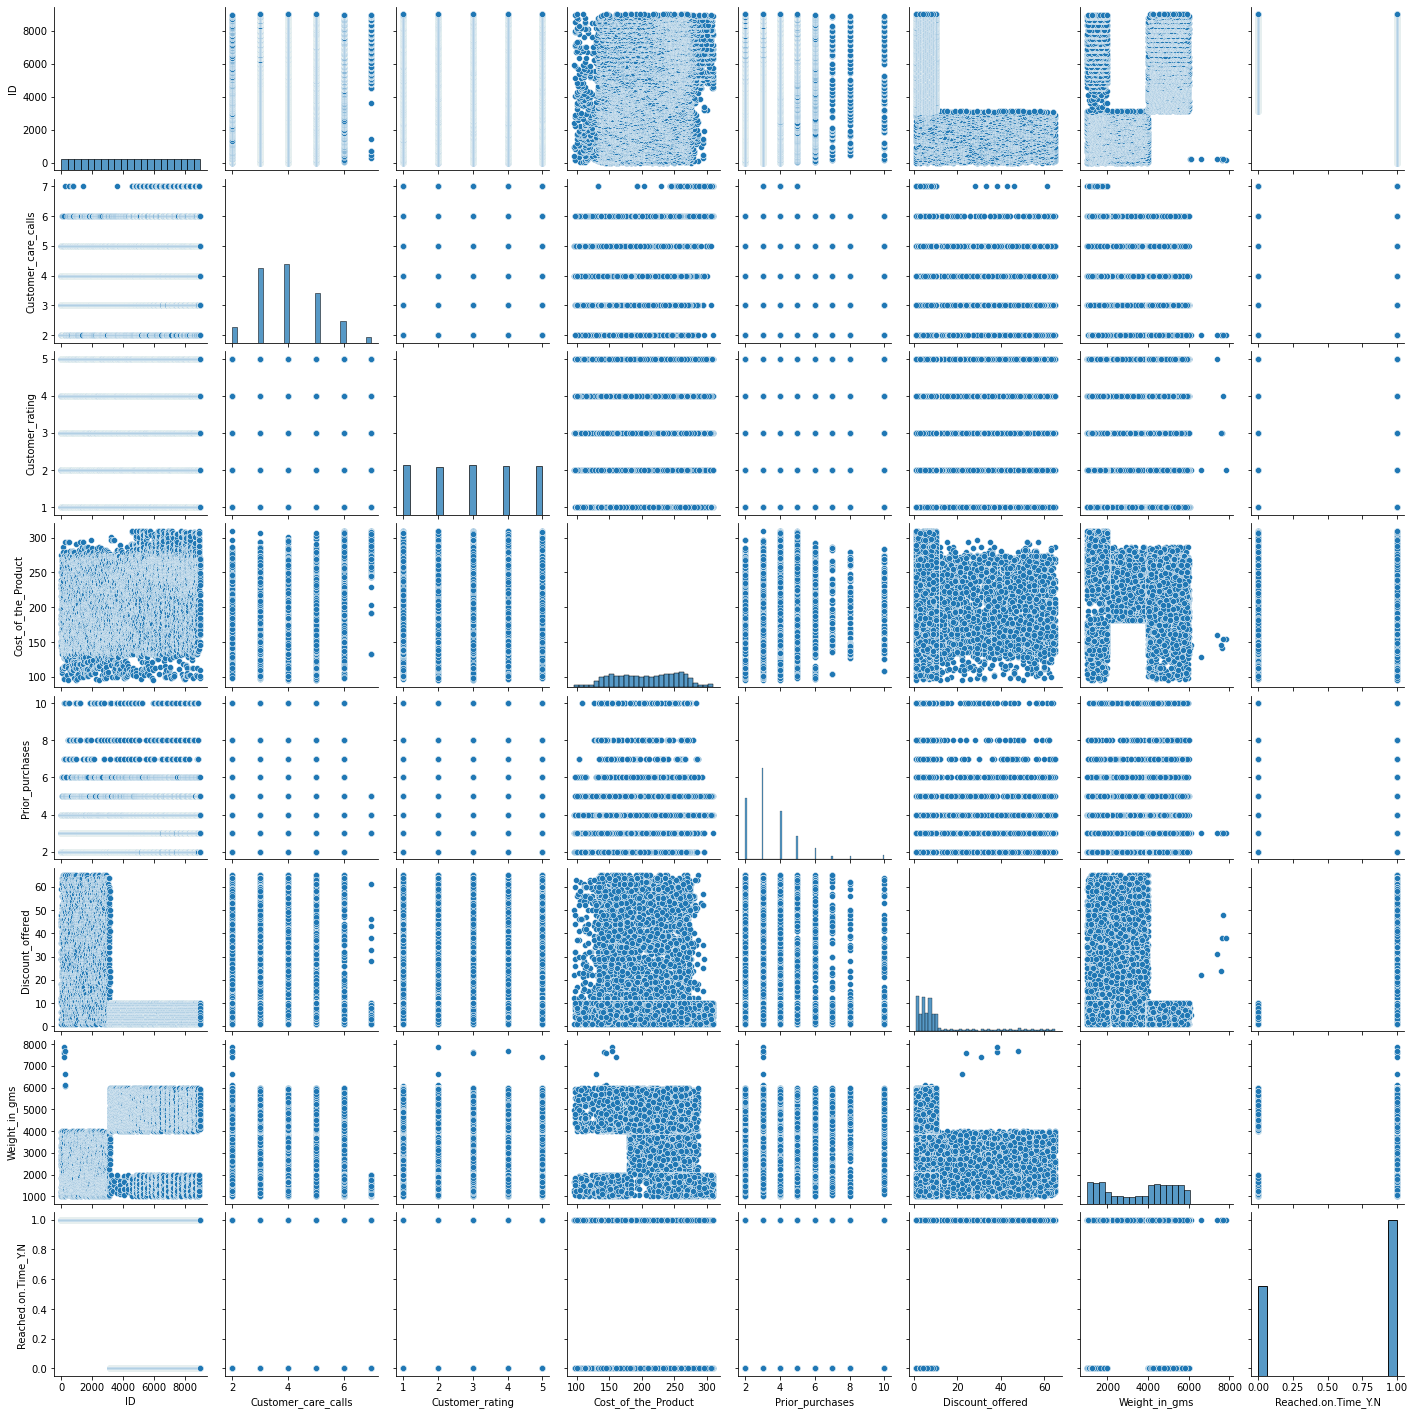

In [9]:
sns.pairplot(data_t)

### Observando distribuciones de algunas variables

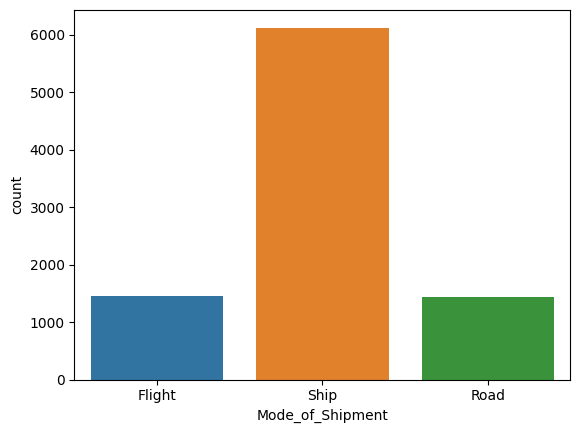

In [10]:
sns.countplot(x='Mode_of_Shipment', data=data_t) 
plt.show()

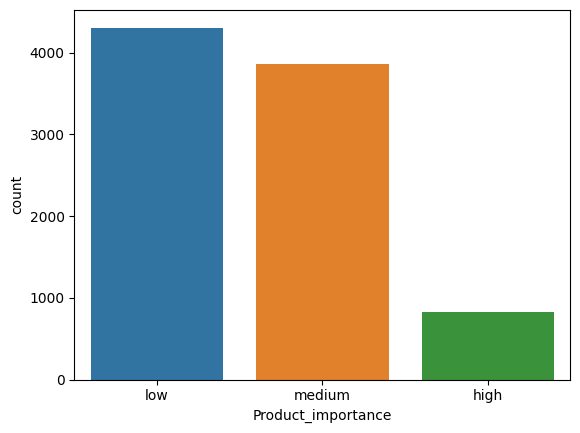

In [11]:
sns.countplot(x='Product_importance', data=data_t) 
plt.show()

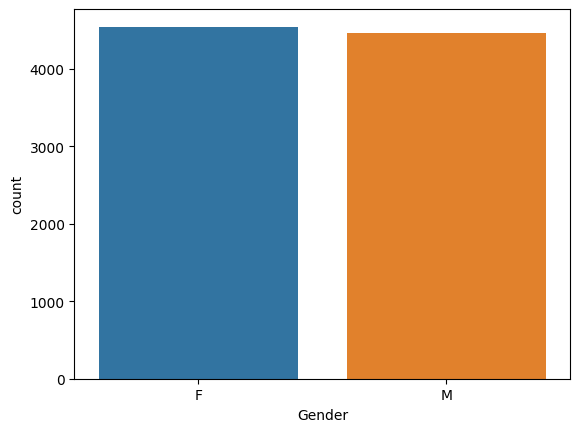

In [12]:
sns.countplot(x='Gender', data=data_t) 
plt.show()

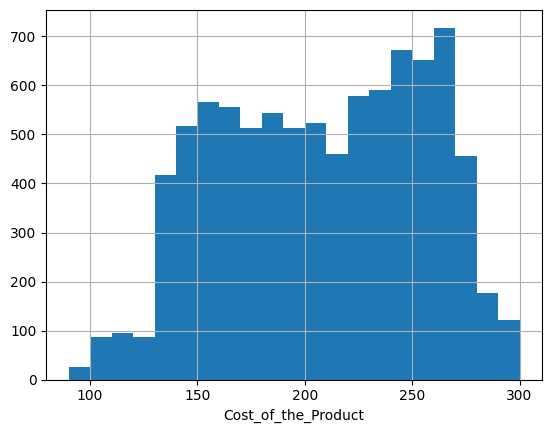

In [13]:
data_t.Cost_of_the_Product.hist(bins = np.arange(90,310,10))
plt.xlabel('Cost_of_the_Product')
plt.show()

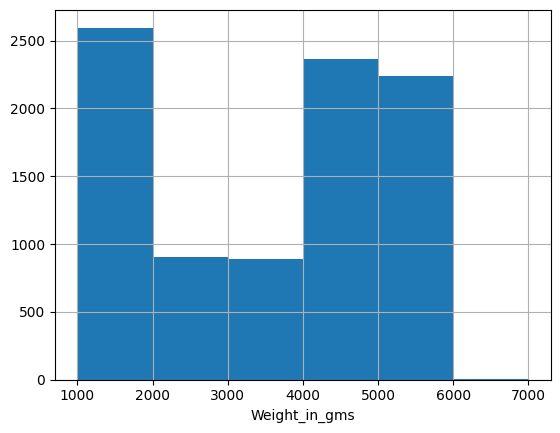

In [14]:
data_t.Weight_in_gms.hist(bins = np.arange(1000,8000,1000))
plt.xlabel('Weight_in_gms')
plt.show()

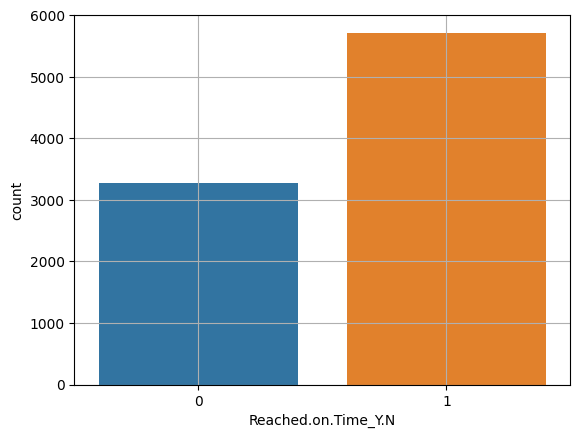

In [15]:
sns.countplot(x='Reached.on.Time_Y.N', data=data_t) 
plt.grid()
plt.show()

### Obteniendo información

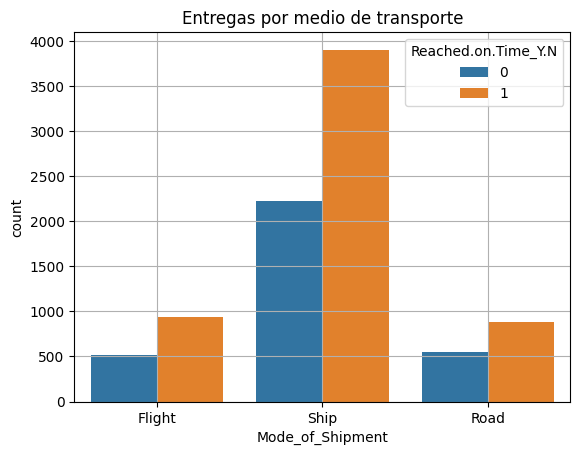

In [16]:
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data_t)
plt.title('Entregas por medio de transporte')
plt.grid()
plt.show()

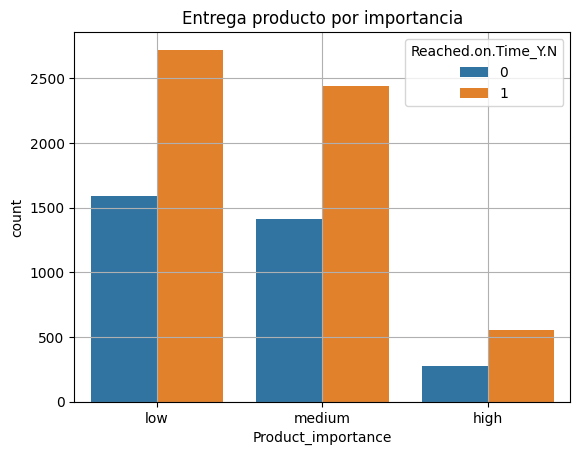

In [17]:
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data_t)
plt.title('Entrega producto por importancia')
plt.grid()
plt.show()

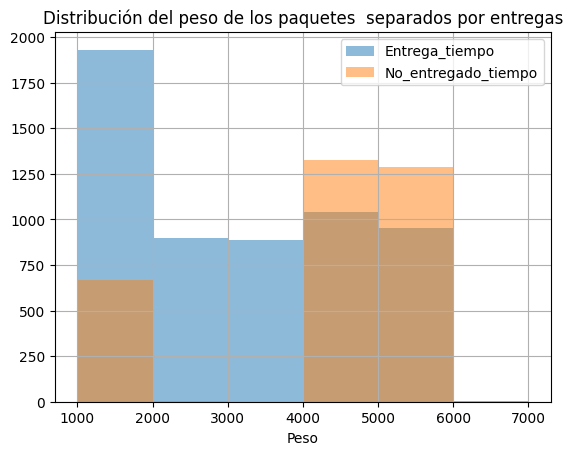

In [18]:
reached_Time = data_t['Reached.on.Time_Y.N'] == 1

weight_reached_time = data_t.Weight_in_gms[reached_Time]
weight_reached_no_time = data_t.Weight_in_gms[~reached_Time]

weight_reached_time.hist(bins = np.arange(1000,8000,1000),label = 'Entrega_tiempo', alpha = 0.5)
weight_reached_no_time.hist(bins = np.arange(1000,8000,1000),label = 'No_entregado_tiempo', alpha = 0.5)

plt.title('Distribución del peso de los paquetes  separados por entregas')
plt.xlabel('Peso')
plt.legend()
plt.show()

# Transformación de datos (Parte 2)

In [19]:
from sklearn.preprocessing import KBinsDiscretizer


In [20]:
estimador = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy = 'uniform')

In [21]:
data_t.drop(columns = 'ID', inplace = True)

In [22]:
data_t.head()



,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [23]:
data_t.rename(columns={'Reached.on.Time_Y.N': 'Reached_on_Time_Y_N'}, inplace=True)

In [24]:
corr = data_t.corr()

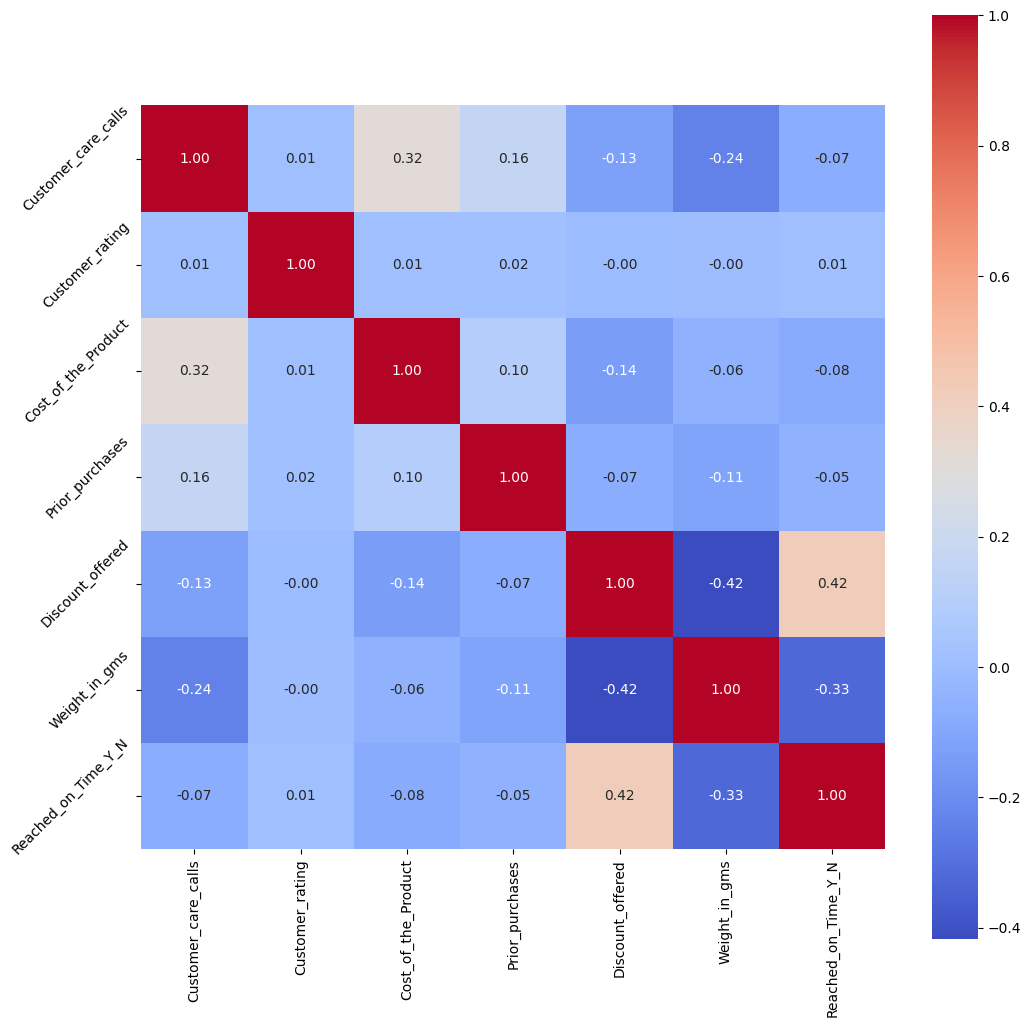

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

In [26]:
Gender = {'F': 0, 'M': 1}
data_t['Gender'] = data_t.Gender.map(Gender)

In [27]:

data_t = pd.concat([data_t, pd.get_dummies(data_t['Mode_of_Shipment'])], axis=1)
data_t.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Flight,Road,Ship
0,D,Flight,4,2,177,3,low,0,44,1233,1,1,0,0
1,F,Flight,4,5,216,2,low,1,59,3088,1,1,0,0
2,A,Flight,2,2,183,4,low,1,48,3374,1,1,0,0
3,B,Flight,3,3,176,4,medium,1,10,1177,1,1,0,0
4,C,Flight,2,2,184,3,medium,0,46,2484,1,1,0,0


In [28]:
data_t = pd.concat([data_t, pd.get_dummies(data_t['Product_importance'])], axis=1)
data_t.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Flight,Road,Ship,high,low,medium
0,D,Flight,4,2,177,3,low,0,44,1233,1,1,0,0,0,1,0
1,F,Flight,4,5,216,2,low,1,59,3088,1,1,0,0,0,1,0
2,A,Flight,2,2,183,4,low,1,48,3374,1,1,0,0,0,1,0
3,B,Flight,3,3,176,4,medium,1,10,1177,1,1,0,0,0,0,1
4,C,Flight,2,2,184,3,medium,0,46,2484,1,1,0,0,0,0,1


In [29]:
data_t = pd.concat([data_t, pd.get_dummies(data_t['Warehouse_block'])], axis=1)

data_t.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,Road,Ship,high,low,medium,A,B,C,D,F
0,D,Flight,4,2,177,3,low,0,44,1233,...,0,0,0,1,0,0,0,0,1,0
1,F,Flight,4,5,216,2,low,1,59,3088,...,0,0,0,1,0,0,0,0,0,1
2,A,Flight,2,2,183,4,low,1,48,3374,...,0,0,0,1,0,1,0,0,0,0
3,B,Flight,3,3,176,4,medium,1,10,1177,...,0,0,0,0,1,0,1,0,0,0
4,C,Flight,2,2,184,3,medium,0,46,2484,...,0,0,0,0,1,0,0,1,0,0


### Discretizacion y binning con S-L

#### Para variable 'Weight_in_gms'

In [30]:
Weight_in_gms = data_t.Weight_in_gms.values
Weight_in_gms.reshape(-1,1).shape
estimador.fit(Weight_in_gms.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [31]:
estimador.bin_edges_

array([array([1001., 2370., 3739., 5108., 6477., 7846.])], dtype=object)

In [32]:
bines_asignados = estimador.transform(Weight_in_gms.reshape(-1,1))

In [33]:
data_t['ranges_Weight_scikit'] = bines_asignados
data_t.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,Ship,high,low,medium,A,B,C,D,F,ranges_Weight_scikit
0,D,Flight,4,2,177,3,low,0,44,1233,...,0,0,1,0,0,0,0,1,0,0.0
1,F,Flight,4,5,216,2,low,1,59,3088,...,0,0,1,0,0,0,0,0,1,1.0
2,A,Flight,2,2,183,4,low,1,48,3374,...,0,0,1,0,1,0,0,0,0,1.0


#### Para variable 'Cost_of_the_Product'

In [34]:
Cost_of_the_Product = data_t.Cost_of_the_Product.values
Cost_of_the_Product.reshape(-1,1).shape
estimador.fit(Cost_of_the_Product.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [35]:
estimador.bin_edges_

array([array([ 96. , 138.8, 181.6, 224.4, 267.2, 310. ])], dtype=object)

In [36]:
data_t['Ranges_cost_Product'] = bines_asignados
data_t.head(3)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,high,low,medium,A,B,C,D,F,ranges_Weight_scikit,Ranges_cost_Product
0,D,Flight,4,2,177,3,low,0,44,1233,...,0,1,0,0,0,0,1,0,0.0,0.0
1,F,Flight,4,5,216,2,low,1,59,3088,...,0,1,0,0,0,0,0,1,1.0,1.0
2,A,Flight,2,2,183,4,low,1,48,3374,...,0,1,0,1,0,0,0,0,1.0,1.0


In [37]:
columns = list(data_t.columns.values)
columns.remove('Reached_on_Time_Y_N')
columns = columns + ['Reached_on_Time_Y_N']
data_t = data_t[columns]
data_t.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,low,medium,A,B,C,D,F,ranges_Weight_scikit,Ranges_cost_Product,Reached_on_Time_Y_N
0,D,Flight,4,2,177,3,low,0,44,1233,...,1,0,0,0,0,1,0,0.0,0.0,1
1,F,Flight,4,5,216,2,low,1,59,3088,...,1,0,0,0,0,0,1,1.0,1.0,1
2,A,Flight,2,2,183,4,low,1,48,3374,...,1,0,1,0,0,0,0,1.0,1.0,1
3,B,Flight,3,3,176,4,medium,1,10,1177,...,0,1,0,1,0,0,0,0.0,0.0,1
4,C,Flight,2,2,184,3,medium,0,46,2484,...,0,1,0,0,1,0,0,1.0,1.0,1


In [38]:
corr = data_t.corr()

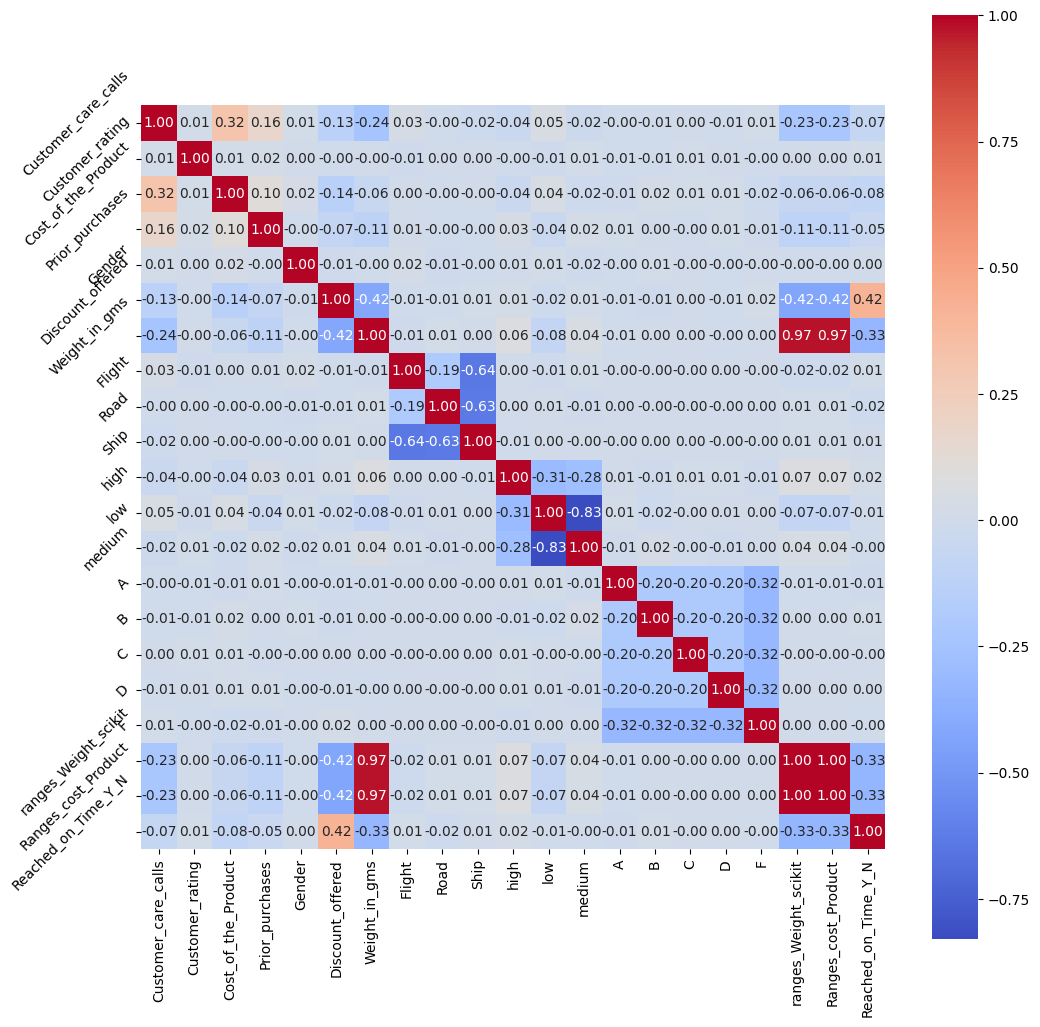

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10}, cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

# Selección del Modelo M-L (Parte 3)

## 1. Árbol de decisión (DecisionTreeClassifier)

#### Creo las variables independiente(X) y dependiente(y)

In [40]:
data_t.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,low,medium,A,B,C,D,F,ranges_Weight_scikit,Ranges_cost_Product,Reached_on_Time_Y_N
0,D,Flight,4,2,177,3,low,0,44,1233,...,1,0,0,0,0,1,0,0.0,0.0,1
1,F,Flight,4,5,216,2,low,1,59,3088,...,1,0,0,0,0,0,1,1.0,1.0,1
2,A,Flight,2,2,183,4,low,1,48,3374,...,1,0,1,0,0,0,0,1.0,1.0,1
3,B,Flight,3,3,176,4,medium,1,10,1177,...,0,1,0,1,0,0,0,0.0,0.0,1
4,C,Flight,2,2,184,3,medium,0,46,2484,...,0,1,0,0,1,0,0,1.0,1.0,1


In [41]:
data_t.Customer_care_calls.unique()

array([4, 2, 3, 5, 6, 7], dtype=int64)

In [42]:
X = data_t[['Prior_purchases', 'Discount_offered', 'Flight', 'Road', 'Ship', 'ranges_Weight_scikit', 'high', 'low', 'medium', 'Ranges_cost_Product']]
y = data_t.Reached_on_Time_Y_N.values

In [43]:
print(X.shape, y.shape)

(8999, 10) (8999,)


#### separo en train y test

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6299, 10)
(2700, 10)
(6299,)
(2700,)


In [45]:
from sklearn.tree import DecisionTreeClassifier


In [46]:
tree = DecisionTreeClassifier(max_depth=5)

#### Entrenando

In [47]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

#### Predicción

In [48]:
# Predecimos sobre nuestro set de entrenamieto
y_pred = tree.predict(X_test)


In [110]:
pred = y_pred

#### Evaluación

In [ ]:
from sklearn.metrics import (classification_report, recall_score, accuracy_score)
from sklearn.metrics import confusion_matrix

In [49]:

 
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 785,  159],
       [ 654, 1102]], dtype=int64)

In [50]:
recall = cm[0][0] / (cm[0][0] + cm[1][0])
print(recall)

0.5455177206393329


In [53]:
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66       944
           1       0.87      0.63      0.73      1756

    accuracy                           0.70      2700
   macro avg       0.71      0.73      0.69      2700
weighted avg       0.76      0.70      0.71      2700



In [54]:
accuracy_score(y_pred, y_test)

0.6988888888888889

In [55]:
recall_score(y_test, y_pred)

0.6275626423690205

## 2. Clasificador de bosque aleatorio (RandomForrestClassifier)

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [59]:
 
# Crear el modelo con 100 arboles
rfc = RandomForestClassifier(n_estimators=31, 
                               bootstrap = True, verbose=2,
                               max_features = 'sqrt')


#### Entrenando

In [60]:
# a entrenar!
rfc.fit(X_train, y_train)

building tree 1 of 31
building tree 2 of 31
building tree 3 of 31
building tree 4 of 31
building tree 5 of 31
building tree 6 of 31
building tree 7 of 31
building tree 8 of 31
building tree 9 of 31
building tree 10 of 31
building tree 11 of 31
building tree 12 of 31
building tree 13 of 31
building tree 14 of 31
building tree 15 of 31
building tree 16 of 31
building tree 17 of 31
building tree 18 of 31
building tree 19 of 31
building tree 20 of 31
building tree 21 of 31
building tree 22 of 31
building tree 23 of 31
building tree 24 of 31
building tree 25 of 31
building tree 26 of 31
building tree 27 of 31
building tree 28 of 31
building tree 29 of 31
building tree 30 of 31
building tree 31 of 31


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


RandomForestClassifier(n_estimators=31, verbose=2)

#### Predicción

In [61]:
ypred_rf = rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


In [115]:
pred = ypred_rf

#### Evaluación

In [62]:
cmrf = confusion_matrix(y_test, ypred_rf)
print(cmrf)

[[ 602  342]
 [ 521 1235]]


In [63]:
accuracy_score(ypred_rf, y_test)

0.6803703703703704

In [64]:
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58       944
           1       0.78      0.70      0.74      1756

    accuracy                           0.68      2700
   macro avg       0.66      0.67      0.66      2700
weighted avg       0.70      0.68      0.69      2700



In [65]:
print(recall_score(y_test, ypred_rf))

0.7033029612756264


## 3. K-vecinos más cercanos (KNeighborsClassifier)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)

#### Entrenando

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Predicción

In [70]:
y_predk = knn.predict(X_test)

In [118]:
pred = y_predk

#### Evaluación

In [71]:
cmknn = confusion_matrix(y_test, y_predk)
print(cmknn)

[[ 543  401]
 [ 469 1287]]


In [72]:
accuracy_score(y_predk, y_test)

0.6777777777777778

In [73]:
print(classification_report(y_test, y_predk))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       944
           1       0.76      0.73      0.75      1756

    accuracy                           0.68      2700
   macro avg       0.65      0.65      0.65      2700
weighted avg       0.68      0.68      0.68      2700



In [74]:
print(recall_score(y_test, y_predk))

0.7329157175398633


## 4. Red neuronal (MLPClassifier)

In [76]:
from sklearn.neural_network import MLPClassifier



In [99]:
nn = MLPClassifier(activation='logistic', hidden_layer_sizes=(11,), max_iter=905, learning_rate_init=0.0001)

#### Entrenando

In [100]:

nn.fit(X_train, y_train)
   

MLPClassifier(activation='logistic', hidden_layer_sizes=(11,),
              learning_rate_init=0.0001, max_iter=905)

#### Predicción

In [101]:
y_prednn = nn.predict(X_test)

In [121]:
pred = y_prednn

#### Evaluación

In [102]:
cmnn = confusion_matrix(y_test, y_prednn)
print(cmnn)

[[ 601  343]
 [ 548 1208]]


In [103]:
print(classification_report(y_test, y_prednn))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57       944
           1       0.78      0.69      0.73      1756

    accuracy                           0.67      2700
   macro avg       0.65      0.66      0.65      2700
weighted avg       0.69      0.67      0.68      2700



In [104]:
accuracy_score(y_prednn, y_test)

0.67

In [105]:
recall_score(y_test, y_prednn)

0.6879271070615034

# Creando archivo martinrojas20.csv

In [122]:
col = ['pred']
df_pred = pd.DataFrame(pred, columns = col)



In [123]:
df_pred.to_csv("martinrojas20.csv", index = False)
